# Overfitting and Underfitting

## Bias vs Variance
**Bias**
- It happens when a model has a tendency to make errors due to oversimplifying the details of the data.
- With High Bias the model is too simplistic and can't capture the true patterns and nuances in the data.
- High Bias causes **Underfitting**

**Variance**
- It happens when the model's sensitivity to the details and small nuances is very high for the training data.
- With High Variance the model is overly complex and fits the data too tightly.
- High Variance causes **Overfitting**

Basically, to reduce overfitting, you trade off perfection with the training data in order to get better utility with new data

**For Regression**

![vb](https://miro.medium.com/v2/resize:fit:1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)

**For Classification**

![fitting.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

**Analogy** 
- Underfitting - student didn't study well and can't answer well
- Overfitting - student cramed/memorized the text book and can only answer those questions
- Appropriate fitting - student learned the information and can apply to new situations

## Addressing Overfitting and Underfitting

### Addressing Overfitting
- Simplify the model by reducing its complexity and noise:
    - Using less features
    - Focusing on features that matter the most
    - Reducing the value/intensity of the hyperparameters (model complexity)
- Applying Regularization (will discuss in detail in the next session)
- Improving data quality
- Increasing the amount of training data to get more diverse examples for the model to learn from
- Employing cross-validation 
- Using Ensemble learning methods

### Addressing Underfitting
- Increase the model's complexity:
    - Adding more insightful features
    - Removing unnecessary features
    - Feature Engineering/Extraction
    - Increasing the value/intensity of the model's hyperparameters
- Adding more relevant data points
- Improving data quality

## Exercise: Detecting and Reducing Overfitting

- For our demo, we'll generate synthetic data using `sklearn` and artificially produce coplexity and noise
- Use Decision Tree Classifier to build different scenarios

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sklearn libraries
from sklearn.datasets import make_classification #to generate synthetic data
from sklearn.model_selection import train_test_split #to split the data into train and test
from sklearn.tree import DecisionTreeClassifier #the ML algo 
from sklearn.metrics import accuracy_score #evaluation

In [3]:
# generate the data

X, y = make_classification(n_samples=9000,
                           n_features=18,
                           n_informative=4,
                           n_redundant=12,
                           random_state=2)

In [4]:
#get the first 2 rows of the features array
print(X[:2])

[[ 2.15631115 -1.69009525  0.85714501 -0.55237974 -1.29713357  2.41049057
   1.21394205  1.09574044 -0.27112028 -0.20828617 -0.74540214  0.15874997
  -0.12124403  0.41527157 -1.4665927   0.24655728 -2.68791625  0.21728147]
 [ 1.12057112 -0.06407922  1.04214442 -0.08316613 -1.09791873  0.90701872
  -1.22117341  1.15110676  0.4542019  -0.5555228  -0.42382371 -0.34233904
  -0.55241524  0.54362834 -1.12509168  0.46288361 -0.97242942  1.05363474]]


In [5]:
y[:30]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1])

In [7]:
#optional - table representation
pd.DataFrame(np.hstack((X,y.reshape(-1,1))))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.156311,-1.690095,0.857145,-0.552380,-1.297134,2.410491,1.213942,1.095740,-0.271120,-0.208286,-0.745402,0.158750,-0.121244,0.415272,-1.466593,0.246557,-2.687916,0.217281,1.0
1,1.120571,-0.064079,1.042144,-0.083166,-1.097919,0.907019,-1.221173,1.151107,0.454202,-0.555523,-0.423824,-0.342339,-0.552415,0.543628,-1.125092,0.462884,-0.972429,1.053635,0.0
2,0.743577,-0.824911,-1.795087,-1.140818,0.828695,0.884580,-0.414306,-1.261001,-0.478853,1.277968,-1.249176,-0.534983,0.078454,0.668052,-0.346653,-1.544109,-0.524343,-1.727458,1.0
3,-1.435744,1.577253,0.288327,0.915041,0.309522,-1.914877,-1.998745,0.029314,0.456918,-0.461416,0.723707,-0.199109,-0.067241,0.421007,0.749434,0.289394,1.800016,0.801596,0.0
4,-0.726817,0.238554,-0.486792,0.397939,0.580280,-0.861943,0.621715,-0.525683,-0.307491,0.200192,0.247341,0.055955,0.409927,-0.822130,0.624040,-0.407364,0.605788,-0.414297,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.830859,1.965363,-0.665370,-0.923464,-0.110722,-0.249474,1.244931,0.057567,1.497159,0.336089,-1.929889,-2.391172,-1.664827,0.535802,-1.652897,-1.149231,1.137957,0.788071,0.0
8996,0.480028,0.653986,0.835577,-0.966696,-0.749638,0.829746,0.204524,0.719419,1.301058,-0.452328,-0.107936,-0.236334,-1.297658,0.563042,-0.718714,1.249289,0.411169,1.128434,1.0
8997,1.802209,0.189373,-1.071166,-1.460649,-0.137728,1.274105,0.092904,-0.212706,0.635148,0.831388,-2.243735,-1.804862,-1.117498,1.931215,-1.859241,-1.484289,-0.583424,-0.325051,1.0
8998,0.809492,-0.189572,0.125969,-0.080578,-0.407116,0.522411,-1.027597,0.372593,0.014116,-0.012773,-0.613109,-0.443309,-0.160150,0.739815,-0.750670,-0.352771,-0.741542,0.185788,0.0


In [8]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=3)

#### Training The Model

- We'll be using **Decision Tree Classifier**
- About:
    - Decision Trees are very popular supervised learning algorithms.
    - Can be used for both **Classification** and **Regression** ML problems:
        - Regression: `DecisionTreeRegressor`
        - Classification: `DecisionTreeClassifier`
    - It creates a tree-like model where each internal node represents an attribute/feature
    - Each branch represents a decision rule and each leaf represents a class label

**Example** for Heart Failure prediction

![dtc](https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png)

**Objective For This Demo**
1. Start the training from a low level of complexity. Then, increase it gradually using a hyperparameter called `max_depth`. This will help show the spectrum between underfitting and overfitting
2. Store the results of both train and test data's prediction accuracy
3. Plot the difference between train and test and spot underfitting and overfitting

Technical Steps - using a loop:
1. Pick a range of depth values (e.g. 20 levels)
2. Define an index value (i) based on the increasing depth
3. Train the model for X_train
4. Predict the model for X_train and X_test
5. Calculate the accuracy of both train and test
6. Append the values into a list
7. Plot the comparison between train and test performance

In [10]:
# create 2 blank lists

train_scores, test_scores = list(), list()

values = range(1,21)
list(values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [11]:
# build the automation loop

for i in values:
    # define the model
    dtc_model = DecisionTreeClassifier(max_depth=i)

    # fit the model
    dtc_model.fit(X_train, y_train)

    # get prediction for the train data and calculate accuracy
    y_pred_train = dtc_model.predict(X_train)
    train_accu = accuracy_score(y_train, y_pred_train)

    # get prediction for the test data and calculate accuracy
    y_pred_test = dtc_model.predict(X_test)
    test_accu = accuracy_score(y_test, y_pred_test)

    #append the values into our lists
    train_scores.append(train_accu)
    test_scores.append(test_accu)

    #log our results
    print(f'max_depth={i} \t| train score:{train_accu:.3f} \t| test score:{test_accu:.3f}')



max_depth=1 	| train score:0.668 	| test score:0.668
max_depth=2 	| train score:0.710 	| test score:0.693
max_depth=3 	| train score:0.796 	| test score:0.781
max_depth=4 	| train score:0.846 	| test score:0.838
max_depth=5 	| train score:0.869 	| test score:0.851
max_depth=6 	| train score:0.900 	| test score:0.874
max_depth=7 	| train score:0.917 	| test score:0.879
max_depth=8 	| train score:0.934 	| test score:0.881
max_depth=9 	| train score:0.946 	| test score:0.887
max_depth=10 	| train score:0.959 	| test score:0.882
max_depth=11 	| train score:0.968 	| test score:0.880
max_depth=12 	| train score:0.976 	| test score:0.879
max_depth=13 	| train score:0.982 	| test score:0.873
max_depth=14 	| train score:0.986 	| test score:0.872
max_depth=15 	| train score:0.990 	| test score:0.870
max_depth=16 	| train score:0.994 	| test score:0.868
max_depth=17 	| train score:0.995 	| test score:0.866
max_depth=18 	| train score:0.997 	| test score:0.861
max_depth=19 	| train score:0.998 	| 

In [12]:
plt.style.use('ggplot')

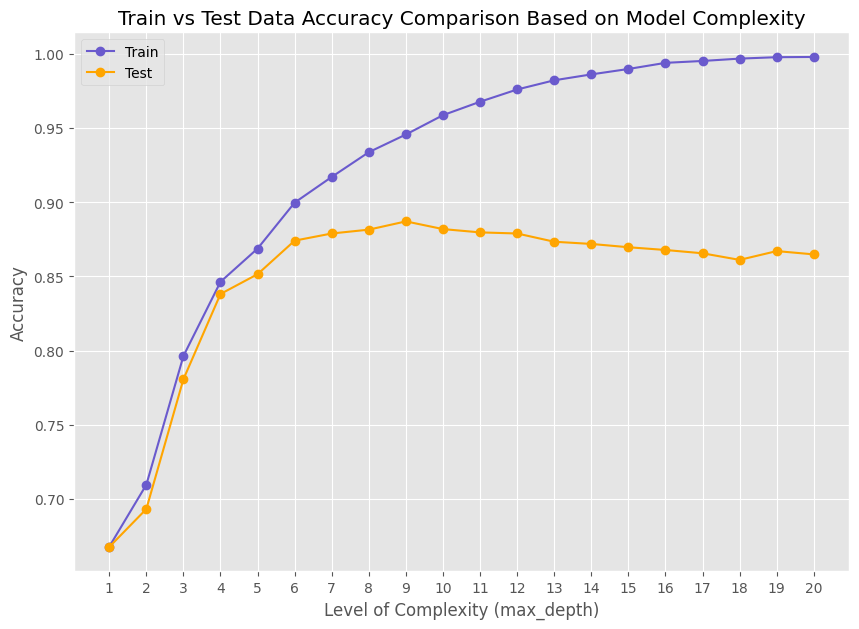

In [17]:
plt.figure(figsize=(10,7))
plt.plot(values, train_scores, '-o', label='Train', color='slateblue')
plt.plot(values, test_scores, '-o', label='Test', color='orange')

plt.title('Train vs Test Data Accuracy Comparison Based on Model Complexity')
plt.ylabel('Accuracy')
plt.xlabel('Level of Complexity (max_depth)')
plt.xticks(values)
plt.legend()

**Observations**
- As the `max_depth` increases, the accuracy of the test data plateaus and declines slightly
- The range of underfitting is between 1 and 3
- The range of overfitting is between 10 and 20
- The *optimal** range for a good fit is between 4 and 9